In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

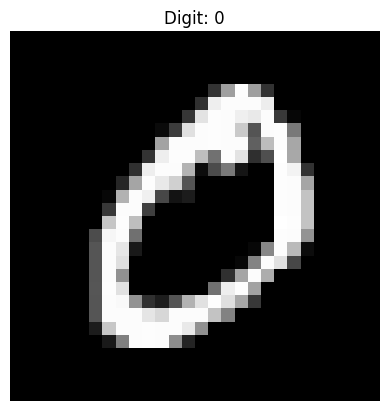

In [6]:
# Display the image
plt.imshow(x_train[1], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title(f"Digit: {y_train[1]}")
plt.axis('off')  # Hide axis
plt.show()

In [7]:
#x_train[1]

In [8]:
x_train[1].max()

255

In [9]:
x_train[1].min()

0

In [10]:
# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
x_train[1].max()

1.0

In [12]:
x_train[1].min()

0.0

In [13]:
x_train[1].shape

(28, 28)

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
# Flatten 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [16]:
x_train[1].shape

(784,)

In [17]:
x_train.shape

(60000, 784)

In [18]:
from tensorflow import keras

# Define the ANN model
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),  # Explicit Input Layer
    keras.layers.Dense(128, activation='relu'),  # Hidden layer 1
    keras.layers.Dense(64, activation='relu'),  # Hidden layer 2
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])


In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
#model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

In [22]:
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8809 - loss: 0.4212 - val_accuracy: 0.9631 - val_loss: 0.1236
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9664 - loss: 0.1111 - val_accuracy: 0.9725 - val_loss: 0.0880
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9781 - loss: 0.0710 - val_accuracy: 0.9711 - val_loss: 0.0937
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9840 - loss: 0.0515 - val_accuracy: 0.9772 - val_loss: 0.0769
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9874 - loss: 0.0396 - val_accuracy: 0.9758 - val_loss: 0.0835
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0307 - val_accuracy: 0.9751 - val_loss: 0.0879
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9915 - loss: 0.0259 - val_accuracy: 0.9767 - val_loss: 0.0858
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9921 - loss: 0.0244 -

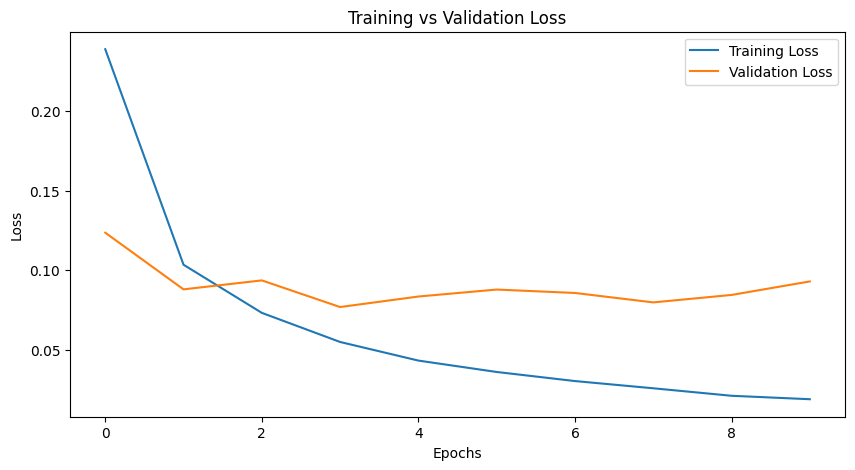

In [23]:
# Plot Training & Validation Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9740 - loss: 0.1134
Test accuracy: 0.9788


In [25]:
# Predict on test images
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
# Display an example
def plot_image(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
    plt.axis('off')
    plt.show()

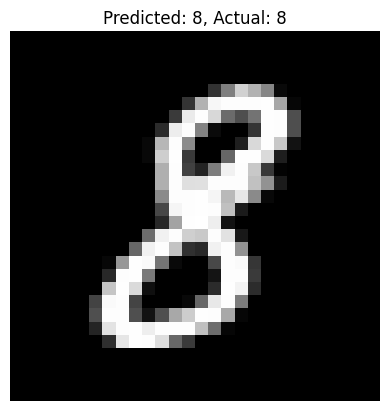

In [27]:
plot_image(110)  # Show the first test image